FIFA19 Elemzés

Készítette:
Somlai Blanka,
Tóth Boglárka,
Kormos Balázs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa = df.drop(columns=(['Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number', 'Contract Valid Until', 'Joined', 'Unnamed: 0']))

In [5]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [7]:
fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


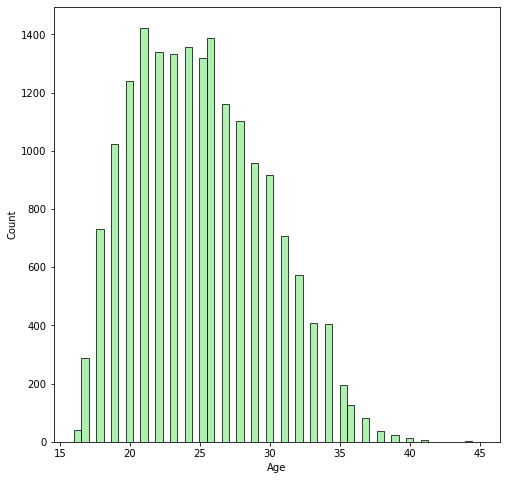

In [9]:
sns.set_palette("colorblind")
plt.figure(figsize=(8,8))
sns.histplot(data=fifa, x="Age",color="lightgreen")
plt.show()

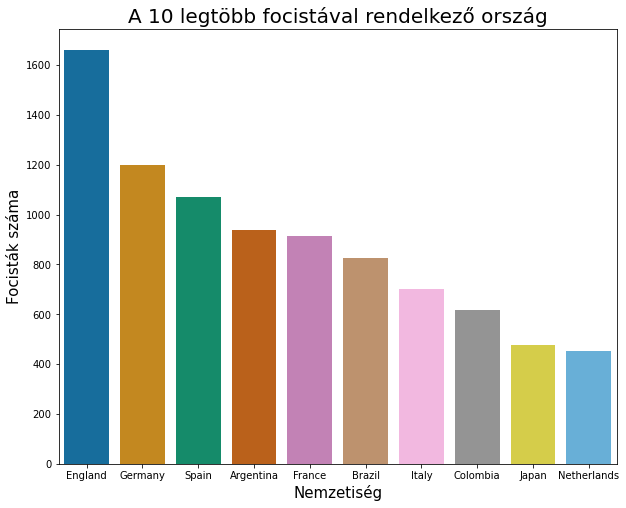

In [10]:
newData = Counter(fifa["Nationality"])
most_countries = newData.most_common(10)

x,y = zip(*most_countries)
x,y = list(x),list(y)
# diagram
plt.figure(figsize=(10,8))
ax= sns.barplot(x=x, y=y) 
plt.xlabel('Nemzetiség', size = 15) 
plt.ylabel('Focisták száma', size=15) 
plt.title('A 10 legtöbb focistával rendelkező ország',size=20) 
plt.show()

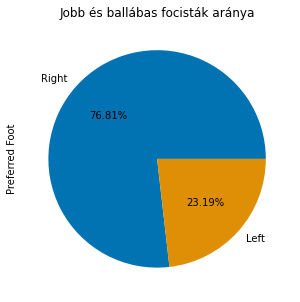

In [11]:
plt.figure(figsize=(5,5))
fifa['Preferred Foot'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Jobb és ballábas focisták aránya')
plt.show()

In [12]:
adatok=[]
def atalakit(oszlop):
    for x in oszlop:
        if x[-1] == 'K':
            adat=float(x.replace('K','').replace('€',''))
            adat=adat*1000
            adatok.append(int(adat))
        elif x[-1] == 'M':
            adat=float(x.replace('M','').replace('€',''))
            adat=adat*1000000
            adatok.append(int(adat))
        else:
            adatok.append(0)
            
            
atalakit(fifa['Value'])
fifa['Valueint']=adatok
adatok=[]
atalakit(fifa['Wage'])
fifa['Wageint']=adatok

print(fifa[['Wage','Wageint','Value','Valueint']])

        Wage  Wageint    Value   Valueint
0      €565K   565000  €110.5M  110500000
1      €405K   405000     €77M   77000000
2      €290K   290000  €118.5M  118500000
3      €260K   260000     €72M   72000000
4      €355K   355000    €102M  102000000
...      ...      ...      ...        ...
18202    €1K     1000     €60K      60000
18203    €1K     1000     €60K      60000
18204    €1K     1000     €60K      60000
18205    €1K     1000     €60K      60000
18206    €1K     1000     €60K      60000

[18207 rows x 4 columns]


In [13]:
fifa.corrwith(fifa['Valueint'])

ID                         -0.138194
Age                         0.075022
Overall                     0.627085
Potential                   0.576218
Special                     0.377738
International Reputation    0.653176
Weak Foot                   0.165221
Skill Moves                 0.315651
Crossing                    0.249785
Finishing                   0.256665
HeadingAccuracy             0.184437
ShortPassing                0.327623
Volleys                     0.288243
Dribbling                   0.272004
Curve                       0.287235
FKAccuracy                  0.265773
LongPassing                 0.302175
BallControl                 0.308818
Acceleration                0.170603
SprintSpeed                 0.172677
Agility                     0.194259
Reactions                   0.540552
Balance                     0.113726
ShotPower                   0.281360
Jumping                     0.124515
Stamina                     0.210721
Strength                    0.128924
L

In [14]:
np.corrcoef(fifa.Valueint, fifa.Wageint)

array([[1.        , 0.85844172],
       [0.85844172, 1.        ]])

Az 5 legértékesebb klub

In [15]:
fifa.groupby('Club')['Valueint'].sum().sort_values(ascending=False)[:5]

Club
Real Madrid          874425000
FC Barcelona         852600000
Manchester City      786555000
Juventus             704475000
FC Bayern München    679025000
Name: Valueint, dtype: int64

Az 5 legnagyobb összértékeléssel rendelkező csapat

In [16]:
fifa.groupby('Club')['Overall'].sum().sort_values(ascending=False)[:5]

Club
Real Madrid          2582
FC Barcelona         2575
Manchester United    2549
Chelsea              2534
Manchester City      2532
Name: Overall, dtype: int64

4-3-3 felállás, kapus, LB, 2 CB, RB, 2CM CAM, LW, ST, RW
Legjobb csapat Overall alapján

In [17]:
csapat=[]
def csapat_osszeallit(poszt, position1, position2, alapjan):
    print('A legjobb 5 ', poszt , 'a(z)', alapjan , 'értékeik alapján :')
    #ha csak a megadott poszt lehet
    if (position1==position2):
        print(fifa[fifa['Position']==position1][['Name',alapjan]].sort_values(by=alapjan,ascending=False)[:5])
        print('*' * 30)
        print('A csapatban a ', poszt, ':')
        #2 középső védő kell
        if (position1=='CB'):
            overall=fifa[fifa['Position']==position1][['Name',alapjan]].nlargest(2, alapjan)
            overall = overall['Name'].squeeze()
            print(overall)
            for x in overall:
                csapat.append(x) 
        #amikből csak egy kell
        else:
            overall = fifa[fifa['Position']==position1].loc[fifa[fifa['Position']==position1][alapjan].idxmax()]
           # overall=fifa[fifa['Position']==position1][['Name',alapjan]].nlargest(1, alapjan)
            print(overall[['Name',alapjan]])
            csapat.append(overall['Name'])
            
    #ha másik poszt is lehet pl. LF LW
    else:                                              
        print(fifa[(fifa['Position'] == position1) |  (fifa['Position'] == position2)]
          [['Name',alapjan]].sort_values(by=alapjan,ascending=False)[:5])
        print('*' * 30)
        print('A csapatban a ', poszt, ':')
        #2 középpályás kell
        if ('CM' in (position1, position2)):
            overall=fifa[(fifa['Position'] == position1) |  (fifa['Position'] == position2)][['Name',alapjan]].nlargest(2,alapjan)
            overall = overall['Name'].squeeze()
            for x in overall:
                csapat.append(x)
        #amikből csak egy kell
        else:
            overall=fifa[(fifa['Position'] == position1) |  (fifa['Position'] == position2)][['Name',alapjan]].nlargest(1,alapjan)
            overall = overall['Name'].squeeze()
            csapat.append(overall)
        print(overall)
    print('-' * 30)

In [18]:

csapat_osszeallit('kapus','GK','GK','Overall')
csapat_osszeallit('bal oldali védő','LB','LB','Overall')
csapat_osszeallit('középső védő','CB','CB','Overall')
csapat_osszeallit('jobb oldali védő','RB','RB','Overall')
csapat_osszeallit('középpályás','CM','CDM','Overall')
csapat_osszeallit('támadó középpályás','CAM','CF','Overall')
csapat_osszeallit('bal szélső','LW','LF','Overall')
csapat_osszeallit('jobb szélső','RW','RF','Overall')
csapat_osszeallit('csatár','ST','ST','Overall')
print('A csapat tagjai:')
print(csapat)

A legjobb 5  kapus a(z) Overall értékeik alapján :
             Name  Overall
3          De Gea       91
9        J. Oblak       90
18  M. ter Stegen       89
19    T. Courtois       89
22       M. Neuer       89
******************************
A csapatban a  kapus :
Name       De Gea
Overall        91
Name: 3, dtype: object
------------------------------
A legjobb 5  bal oldali védő a(z) Overall értékeik alapján :
            Name  Overall
35       Marcelo       88
49    Jordi Alba       87
64   Alex Sandro       86
85      D. Alaba       85
106  Filipe Luís       85
******************************
A csapatban a  bal oldali védő :
Name       Marcelo
Overall         88
Name: 35, dtype: object
------------------------------
A legjobb 5  középső védő a(z) Overall értékeik alapján :
            Name  Overall
12      D. Godín       90
42     S. Umtiti       87
73    M. Benatia       86
89   N. Otamendi       85
102        Naldo       85
******************************
A csapatban a  középső v

Legjobb csapat a Value alapján

In [19]:
csapat=[]
csapat_osszeallit('kapus','GK','GK','Valueint')
csapat_osszeallit('bal oldali védő','LB','LB','Valueint')
csapat_osszeallit('középső védő','CB','CB','Valueint')
csapat_osszeallit('jobb oldali védő','RB','RB','Valueint')
csapat_osszeallit('középpályás','CM','CDM','Valueint')
csapat_osszeallit('támadó középpályás','CAM','CF','Valueint')
csapat_osszeallit('bal szélső','LW','LF','Valueint')
csapat_osszeallit('jobb szélső','RW','RF','Valueint')
csapat_osszeallit('csatár','ST','ST','Valueint')
print('A csapat tagjai:')
print(csapat)

A legjobb 5  kapus a(z) Valueint értékeik alapján :
             Name  Valueint
3          De Gea  72000000
9        J. Oblak  68000000
18  M. ter Stegen  58000000
19    T. Courtois  53500000
57        Ederson  41500000
******************************
A csapatban a  kapus :
Name          De Gea
Valueint    72000000
Name: 3, dtype: object
------------------------------
A legjobb 5  bal oldali védő a(z) Valueint értékeik alapján :
            Name  Valueint
35       Marcelo  43000000
85      D. Alaba  38000000
49    Jordi Alba  38000000
64   Alex Sandro  36500000
112  Alex Telles  32000000
******************************
A csapatban a  bal oldali védő :
Name         Marcelo
Valueint    43000000
Name: 35, dtype: object
------------------------------
A legjobb 5  középső védő a(z) Valueint értékeik alapján :
           Name  Valueint
42    S. Umtiti  57000000
12     D. Godín  44000000
115     N. Süle  36500000
127  S. de Vrij  31500000
73   M. Benatia  30000000
******************************

Juventus bajnokok ligája csoportkör a 2018/2019-es szezonban:

<img src="Bl_csoport.png">

FIFA19 játékban lefolytattunk néhány szimulált szezont, itt láthatjuk a Juventus csoportkörökben elért eredményét:

<img src="1Bl_csoport.png">
<img src="2Bl_csoport.png">
<img src="3Bl_csoport.png">
<img src="4Bl_csoport.png">
<img src="5Bl_csoport.png">

Javarészt a játékban szimulált csoportkörös meccsek hasonlóan alakultak, mint a való életben, azonban az 5 szimuláció során egyszer előfordult a Juventus kiesése a bajnokok ligájában, már a csoportkörnél. De ezt leszámítva mondhatjuk, hogy a játék nagyjából jól tükrözte a valóságot. Amit még érdemes megfigyelni, hogy a FIFA19-ben mekkora az eltérés ez a 4 csapat között, és hogy az eltérésekhez képest reálisak-e a szimulált csoportkörök.

In [20]:
def csapatinfo(csapat):
    g = fifa.groupby('Club')['Valueint'].sum()
    jatekos = fifa.groupby('Club')['Overall'].count()
    g2 = round(fifa.groupby('Club')['Overall'].mean(), 2)    
    atlagKor = round(fifa.groupby('Club')['Age'].mean(), 2)
    print('A(z) ', csapat, ' játékosainak összértéke: ', g[csapat], 
          '\n A csapat átlagos értékelése: ', g2[csapat], 
          '\n A csapatban ', jatekos[csapat], ' játékos játszik.',
          '\n A csapat átlagos életkora: ', atlagKor[csapat], 
          '\n ____________________________________________________________')


In [21]:
csapatinfo('Juventus')
csapatinfo('Manchester United')
csapatinfo('Valencia CF')
csapatinfo('BSC Young Boys')

A(z)  Juventus  játékosainak összértéke:  704475000 
 A csapat átlagos értékelése:  82.28 
 A csapatban  25  játékos játszik. 
 A csapat átlagos életkora:  27.16 
 ____________________________________________________________
A(z)  Manchester United  játékosainak összértéke:  588850000 
 A csapat átlagos értékelése:  77.24 
 A csapatban  33  játékos játszik. 
 A csapat átlagos életkora:  24.76 
 ____________________________________________________________
A(z)  Valencia CF  játékosainak összértéke:  394225000 
 A csapat átlagos értékelése:  74.7 
 A csapatban  33  játékos játszik. 
 A csapat átlagos életkora:  23.06 
 ____________________________________________________________
A(z)  BSC Young Boys  játékosainak összértéke:  51300000 
 A csapat átlagos értékelése:  66.71 
 A csapatban  24  játékos játszik. 
 A csapat átlagos életkora:  24.08 
 ____________________________________________________________


<AxesSubplot:xlabel='Club'>

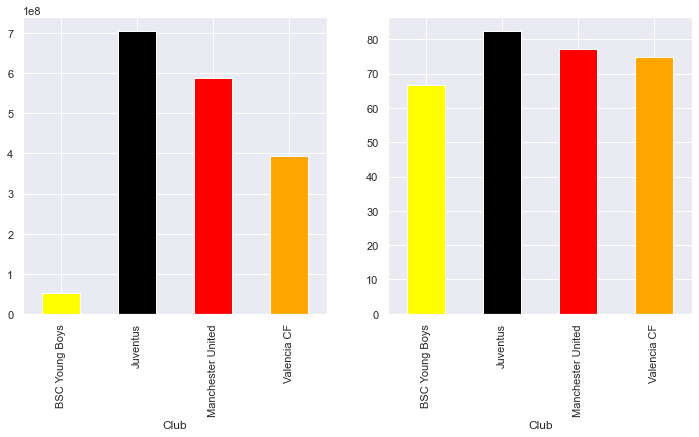

In [65]:
csapatok = ('Juventus', 'Manchester United', 'Valencia CF', 'BSC Young Boys')
hasonlitas = fifa[fifa['Club'].isin(csapatok)]

plt.figure(figsize=(12,12))

plt.subplot(221)
hasonlitas.groupby('Club')['Valueint'].sum().plot(kind='bar', color=['yellow', 'black', 'red', 'orange'])

plt.subplot(222)
hasonlitas.groupby('Club')['Overall'].mean().plot(kind='bar', color=['yellow', 'black', 'red', 'orange'])

Az előbbi elemzésből arra következtethetünk, hogy a Juventusnak jóval több sztárjátékosa van, hiszen sokkal kevesebben fociznak abban a csapatban, mint mondjuk a Manchester United-ben, mégis sokkal nagyobb az összértékük. Az átlagos értékelése is jelentősen magasabb az olasz csapatnak, ez viszont adódhat abból is, hogy több ifijátékos van a United keretében. Ezt az átlagéletkorból is láthatjuk.

Mindent összevetve jól látható, hogy nem hiába nyerte meg a Juventus 5 szimulációból 4-szer is a csoportkört, hiszen egy tapasztaltabb, sztárjátékosokkal tűzdelt csapatuk van, míg a többi csapat gyengébb játékosokból áll, azonban fiatal tehetségekből, akik hajlamosak lehetnek meglepetést okozni. De azt azért meg kell jegyezni, hogy hiába sokkal értékesebb, és tapasztaltabb a Juventus a csoportkörös ellenfeleinél a FIFA19-ben, mégis a megszerezhető 18 pontból maximum 13-at sikerült megszerezniük, valamint egyszer mégiscsak harmadik helyen végeztek, szóval nem biztos, hogy reálisan működik a szimuláció. Ezt fogjuk a továbbiakban is vizsgálni.

A valós életben a BL döntő alakulása a 2018/2019-es szezonban:
<img src="Bl_valos_donto.png">

A FIFA19-ben lefolytatott szimulációk BL döntőinek eredményei:
<img src="1Bl_donto.png">
<img src="2Bl_donto.png">
<img src="3Bl_donto.png">
<img src="4Bl_donto.png">
<img src="5Bl_donto.png">

5 alkalomból 3-szor jutott döntőbe, 2-szer meg is nyerte a Liverpool, amely a valóságban is magasba emelhette a kupát. Ilyen szempontból tehát megint eléggé hasonlított a szimuláció a valósághoz. Azonban a valóságban döntőig menetelő Spurs a közelébe sem jutott a döntőnek a játékban. Ami szintén egy érdekes dolog, hogy a Juventus szintén 5-ből 3-szor eljutott a döntőbe, 2-szer meg is nyerte azt, pedig a valósgban már a negyeddöntőben kiesett.

In [22]:
fifa.groupby('Club')['Valueint'].sum().sort_values(ascending=False)[:10]

Club
Real Madrid            874425000
FC Barcelona           852600000
Manchester City        786555000
Juventus               704475000
FC Bayern München      679025000
Atlético Madrid        644525000
Paris Saint-Germain    625325000
Tottenham Hotspur      618450000
Chelsea                606815000
Manchester United      588850000
Name: Valueint, dtype: int64

Érdekes megfigyelni a szimulációk során remeklő két csapatot. A Juventus ugyan a 4. legértékesebb csapat, de a Liverpool még a top10-ben sincsen. Rajtuk kívül az Atlético Madrid tudott diadalmaskodni, akkor a Manchester United-et győzte le, akik szintén benne vannak a top10 legértékesebb klub listájában. Ezen felül még az FC Porto és az Olympic Lyon tudott döntőbe jutni, akiknek az értéke meg sem közelíti a top csapatokét. Ellenben a top10 legértékesebb csapat közül 7 még csak a döntőbe sem tudott jutni. Ez megintcsak arra enged következtetni, hogy elég nagy a véletlen faktor a FIFA19-es szimulációk során.

Olasz bajnokság 2018/2019-es szezon végeredménye a valóságban:
<img src="Olasz_valos_lista.png">

Nézzük meg, hogy ennek a négy csapatnak milyen erős kerete van a FIFA19-ben.

In [23]:
csapatinfo('Juventus')
csapatinfo('Napoli')
csapatinfo('Atalanta')
csapatinfo('Inter')

A(z)  Juventus  játékosainak összértéke:  704475000 
 A csapat átlagos értékelése:  82.28 
 A csapatban  25  játékos játszik. 
 A csapat átlagos életkora:  27.16 
 ____________________________________________________________
A(z)  Napoli  játékosainak összértéke:  514000000 
 A csapat átlagos értékelése:  80.0 
 A csapatban  25  játékos játszik. 
 A csapat átlagos életkora:  25.92 
 ____________________________________________________________
A(z)  Atalanta  játékosainak összértéke:  161405000 
 A csapat átlagos értékelése:  72.58 
 A csapatban  24  játékos játszik. 
 A csapat átlagos életkora:  24.54 
 ____________________________________________________________
A(z)  Inter  játékosainak összértéke:  466485000 
 A csapat átlagos értékelése:  79.75 
 A csapatban  24  játékos játszik. 
 A csapat átlagos életkora:  27.46 
 ____________________________________________________________


<AxesSubplot:xlabel='Club'>

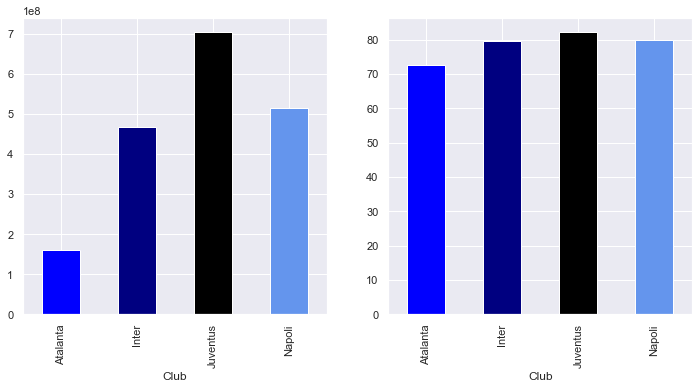

In [68]:
csapatok = ('Juventus', 'Napoli', 'Atalanta', 'Inter')
hasonlitas = fifa[fifa['Club'].isin(csapatok)]

plt.figure(figsize=(12,12))

plt.subplot(221)
hasonlitas.groupby('Club')['Valueint'].sum().plot(kind='bar', color=['blue', 'navy', 'black', 'cornflowerblue'])

plt.subplot(222)
hasonlitas.groupby('Club')['Overall'].mean().plot(kind='bar', color=['blue', 'navy', 'black', 'cornflowerblue'])

Ezek alapján arra lehet következtetni, hogy ha a FIFA19-ben szimulálnánk néhány szezont, akkor hasonló eredményeket kaphatnánk, hiszen a Juventus magasan a legerősebb csapat több szempontból is. Egyedül az Atalanta a kakukktojás, valószínűleg a top4 közelébe sem kerülnének, hiszen egy nagyon fiatal csapatról van szó, akiknél nincs sok kiemelkedő játékos. Ez a valóságban is igaz volt, ellenben ott sokszor megmutatkozik az, hogy egy kis csapat is tud sikereket elérni. De nézzük meg, hogy milyen eredményeket kapunk, ha a FIFA19-ben leszimuláljuk párszor a 2018/2019-es szezont:

<img src="1Olasz_lista.png">
<img src="2Olasz_lista.png">
<img src="3Olasz_lista.png">

Meglehetősen érdekes eredmények születtek, az első szimulációnál 3 csapat is a top4-ben végzett azok közül, akik a valóságban is bl szereplést értek el, igaz kicsit másabb sorrendet figyelhetünk meg. A következő két szimulációnál viszont teljesen máshogy alakultak a dolgok. Az elért pontszámok is egészen közel járnak a valóshoz mind a 3 FIFA szezon után.
Vizsgáljuk meg jobban a FIFA-ban top4-ben végzett csapatokat.

In [24]:
csapatinfo('Juventus')
csapatinfo('Inter')
csapatinfo('Milan')
csapatinfo('Napoli')
csapatinfo('Lazio')
csapatinfo('Torino')

A(z)  Juventus  játékosainak összértéke:  704475000 
 A csapat átlagos értékelése:  82.28 
 A csapatban  25  játékos játszik. 
 A csapat átlagos életkora:  27.16 
 ____________________________________________________________
A(z)  Inter  játékosainak összértéke:  466485000 
 A csapat átlagos értékelése:  79.75 
 A csapatban  24  játékos játszik. 
 A csapat átlagos életkora:  27.46 
 ____________________________________________________________
A(z)  Milan  játékosainak összértéke:  416999999 
 A csapat átlagos értékelése:  78.07 
 A csapatban  27  játékos játszik. 
 A csapat átlagos életkora:  25.0 
 ____________________________________________________________
A(z)  Napoli  játékosainak összértéke:  514000000 
 A csapat átlagos értékelése:  80.0 
 A csapatban  25  játékos játszik. 
 A csapat átlagos életkora:  25.92 
 ____________________________________________________________
A(z)  Lazio  játékosainak összértéke:  352135000 
 A csapat átlagos értékelése:  75.44 
 A csapatban  32  játé

<AxesSubplot:xlabel='Club'>

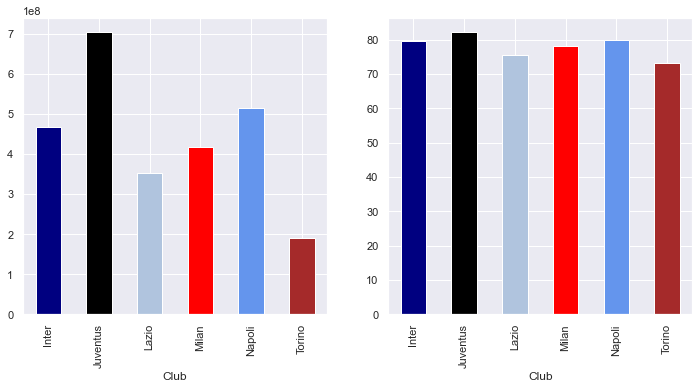

In [70]:
csapatok = ('Juventus', 'Inter', 'Milan', 'Napoli', 'Lazio', 'Torino')
hasonlitas = fifa[fifa['Club'].isin(csapatok)]

plt.figure(figsize=(12,12))

plt.subplot(221)
hasonlitas.groupby('Club')['Valueint'].sum().plot(kind='bar', color=['navy', 'black', 'lightsteelblue', 'red', 'cornflowerblue', 'brown'])

plt.subplot(222)
hasonlitas.groupby('Club')['Overall'].mean().plot(kind='bar', color=['navy', 'black', 'lightsteelblue', 'red', 'cornflowerblue', 'brown'])

Egyedül az első szimulációt mondhatjuk reálisnak a csapatok erőssége alapján. Az is érdekes, hogy 2-szer is az Inter nyert, míg nagyjából másfélszer annyit ér a Juventus csapata, és jóval jobb értékeléssel rendelkező játékosaik vannak. Azonban ami még érdekesebb, hogy a Torino két szezonban is a negyedik tudott lenni, sok olyan csapatok maga mögé utasítva, akiknek sokkal mélyebb, erősebb keretük van.

Ez pedig egy külön érdekesség, hogy a valóságban kiválóan szereplő Atalanta milyen teljesítményt nyújtott az egyik szimulált szezon során:
<img src="1Olasz_kiesok.png">

Nézzük meg, hogy milyen erősségű csapatokkal teljesített hasonló szinten az egyébként 3. helyezett meglepetéscsapat:

In [25]:
csapatinfo('Atalanta')
csapatinfo('Parma')
csapatinfo('Genoa')

A(z)  Atalanta  játékosainak összértéke:  161405000 
 A csapat átlagos értékelése:  72.58 
 A csapatban  24  játékos játszik. 
 A csapat átlagos életkora:  24.54 
 ____________________________________________________________
A(z)  Parma  játékosainak összértéke:  82945000 
 A csapat átlagos értékelése:  70.1 
 A csapatban  29  játékos játszik. 
 A csapat átlagos életkora:  27.69 
 ____________________________________________________________
A(z)  Genoa  játékosainak összértéke:  108640000 
 A csapat átlagos értékelése:  72.15 
 A csapatban  27  játékos játszik. 
 A csapat átlagos életkora:  25.78 
 ____________________________________________________________


<AxesSubplot:xlabel='Club'>

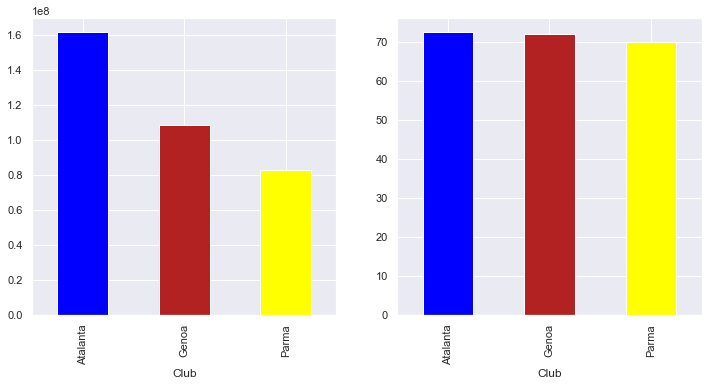

In [72]:
csapatok = ('Atalanta', 'Parma', 'Genoa')
hasonlitas = fifa[fifa['Club'].isin(csapatok)]

plt.figure(figsize=(12,12))

plt.subplot(221)
hasonlitas.groupby('Club')['Valueint'].sum().plot(kind='bar', color=['blue', 'firebrick', 'yellow'])

plt.subplot(222)
hasonlitas.groupby('Club')['Overall'].mean().plot(kind='bar', color=['blue', 'firebrick', 'yellow'])

Ez valószínűleg valami ritka véletlen lehetett, mert a többi szimuláció sorána  középmezőnyben végeztek, azonban ez is jól mutatja, hogy nem biztos, hogy olyan jól tükrözi a valós erőviszonyokat a játék.

És végül hasonlítsuk össze a 2018/2019-es szezon bl góllövőlistáját a játékban szimulált szezonokéval:
<img src="BL_valos_golok.png">

Nézzünk néhány adatot a FIFA19-ben ezekről a játékosokról:

In [26]:
gollovok = ('L. Messi', 'R. Lewandowski', 'D. Tadić')
top3 = fifa[fifa['Name'].isin(gollovok)].head(3)
top3[['Name', 'Age', 'Club', 'Overall', 'Potential', 'Value', 'Wage', 'Position', 'Finishing', 'ShotPower', 'LongShots']]

,Name,Age,Club,Overall,Potential,Value,Wage,Position,Finishing,ShotPower,LongShots
0,L. Messi,31,FC Barcelona,94,94,€110.5M,€565K,RF,95.0,85.0,94.0
10,R. Lewandowski,29,FC Bayern München,90,90,€77M,€205K,ST,91.0,88.0,84.0
365,D. Tadić,29,Ajax,81,81,€17.5M,€26K,LAM,74.0,69.0,65.0


Messi és Lewandowski is kiemelkedő adatokkal rendelkezik a játékban is, könnyen elképzelhető, hogy jól teljesítenek egy-egy szimuláció után. Azonban Tadic-nak nem sok esélye van, hiszen a gólokhoz szükséges adatai nem elég jók.

Az egy játékos által lőtt gólok tekintetében nem volt kiemelkedő a szezon, hiszen 6 góllal már dobogós lehetett Tadic, amelyre legutóbb a 2007/2008-as szezonban volt példa, de nézzük meg, hogy a játékban milyen eredmények születtek:
<img src="1BL_golok.png">
<img src="2BL_golok.png">
<img src="3BL_golok.png">
<img src="4BL_golok.png">
<img src="5BL_golok.png">

Egészen meglepő, hogy a valóságban győztes Messi az 5 szimuláció egyikén sem tudott még csak dobogós helyet sem elérni. De a második helyezett Lewandowski neve is csak egyszer került fel a dobogó második fokára... Leggyakrabban Liverpool és Juventus játékosok vannak a legjobb 3 között, de ez abból adódhat, hogy ez a két csapat jutott legtöbbször a döntőbe, így több meccsen volt esélyük gólt szerezni. Nézzük meg a valóságban, valamint a játékban legalább a dobogót elérő góllövők adatait:

In [27]:
gollovok = ('L. Messi', 'R. Lewandowski', 'D. Tadić', 'S. Mané', 'A. Griezmann', 'Cristiano Ronaldo', 'E. Cavani', 
            'S. Agüero', 'R. Lukaku', 'P. Dybala', 'M. Salah', 'M. Dembélé', 'Roberto Firmino')
top = fifa[fifa['Name'].isin(gollovok)]
top = top.drop([220, 10585, 11146, 16398]) #név egyezés miatt törölni kell néhány sort
top[['Name', 'Age', 'Club', 'Overall', 'Potential', 'Value', 'Wage', 'Position', 'Finishing', 'ShotPower', 'LongShots']]

,Name,Age,Club,Overall,Potential,Value,Wage,Position,Finishing,ShotPower,LongShots
0,L. Messi,31,FC Barcelona,94,94,€110.5M,€565K,RF,95.0,85.0,94.0
1,Cristiano Ronaldo,33,Juventus,94,94,€77M,€405K,ST,94.0,95.0,93.0
10,R. Lewandowski,29,FC Bayern München,90,90,€77M,€205K,ST,91.0,88.0,84.0
15,P. Dybala,24,Juventus,89,94,€89M,€205K,LF,84.0,82.0,88.0
17,A. Griezmann,27,Atlético Madrid,89,90,€78M,€145K,CAM,90.0,80.0,82.0
21,E. Cavani,31,Paris Saint-Germain,89,89,€60M,€200K,LS,89.0,87.0,79.0
23,S. Agüero,30,Manchester City,89,89,€64.5M,€300K,ST,93.0,88.0,83.0
26,M. Salah,26,Liverpool,88,89,€69.5M,€255K,RM,90.0,77.0,83.0
47,R. Lukaku,25,Manchester United,87,89,€62.5M,€230K,ST,87.0,88.0,74.0
58,S. Mané,26,Liverpool,86,87,€52M,€195K,LM,84.0,82.0,74.0


5 szimuláció alatt javarészt csak olyan játékosok kerültek fel a dobogóra, akik oda is valók. Remek adottságaik vannak a gólszerzéshez, és az értékelésük is elég magas. Ami inkább meglepő, hogy bizonyos nevek egyszer sem tudtak a top3-ban végezni, gondolok itt Neymar-ra, vagy Mbappé-ra, akiknek szintén elég jók az adottságik, és támadó játékosok. De tökéletes példa a már említett Lionel Messi is. Nézzük meg ezeket is:

In [28]:
pelda = ('L. Messi', 'Neymar Jr', 'K. Mbappé')
top = fifa[fifa['Name'].isin(pelda)]
top[['Name', 'Age', 'Club', 'Overall', 'Potential', 'Value', 'Wage', 'Position', 'Finishing', 'ShotPower', 'LongShots']]

,Name,Age,Club,Overall,Potential,Value,Wage,Position,Finishing,ShotPower,LongShots
0,L. Messi,31,FC Barcelona,94,94,€110.5M,€565K,RF,95.0,85.0,94.0
2,Neymar Jr,26,Paris Saint-Germain,92,93,€118.5M,€290K,LW,87.0,80.0,82.0
25,K. Mbappé,19,Paris Saint-Germain,88,95,€81M,€100K,RM,88.0,79.0,78.0


Ehhez képest figyeljük meg, hogy milyen kvalitású játékos nem csak bejutott a top3-ba, de meg is nyerte a góllövőlistát:

In [29]:
top = fifa.iloc[1403]
top[['Name', 'Age', 'Club', 'Overall', 'Potential', 'Value', 'Wage', 'Position', 'Finishing', 'ShotPower', 'LongShots']]

Name                 M. Dembélé
Age                          21
Club         Olympique Lyonnais
Overall                      76
Potential                    85
Value                      €12M
Wage                       €43K
Position                     ST
Finishing                    76
ShotPower                    75
LongShots                    62
Name: 1403, dtype: object

Egyetlen adata sem közelíti meg a feljebb említett nevekét.

Mindent összevetve, összefoglaljuk, hogy miket szűrhetünk le a valós eredmények, valós erőviszonyok, és a FIFA19-ben elért szimulációk közötti kapcsolatról. Bár sok esetben nagyon jól modellezték, hogy mely csapatok a legerősebbek, mely játékosok a legjobbak, mégis nagyon érdekes eredmények születtek sokszor a játékban. Azt vehetjük észre, hogy a szimulációban van egy elég nagy random faktor, nem egyértelműen a legjobb csapatok nyerék a BL-t, nem a legjobb támadók lőtték a legtöbb gólt. Ez résben tükrözi a valóságot, mert a labda gömbölyű, és nem mindig nyer a legjobb csapat. Azonban ennek ellenére is születtek érdekes eredmények, például a Juventus és a Liverpool 3-3 alkalommal járt a BL döntőben, míg a legértékesebb csapatok, csak néhányat említve, Real Madrid, Barcelona, Bayern München, PSG, Manchester City még csak nem is jutott el egyszer sem a döntőig, ellenben egy sokkal gyengébb játékerőt képviselő Porto vagy Lyon igen. A játékosoknál is hasonló a helyzet, hiszen nem a legjobb támadók lőtték a legtöbb gólt, ellenben volt meglepetés nyertes is Dembelé személyében.

Forrás: https://www.kaggle.com/karangadiya/fifa19